####LOADING DATA & EDA

In [1]:
!pip install openpyxl #pandas needs the openpyxl library to read Excel files


import pandas as pd

# Load the CSV file (Mall Customers dataset)
mall_df = pd.read_csv("Mall_Customers.csv")

# Load the Excel file (Online Retail dataset)
retail_df = pd.read_excel("Online Retail.xlsx")

# Display the first 5 rows of each dataset
print("Mall Customers dataset:")
print(mall_df.head())

print("\nOnline Retail dataset:")
print(retail_df.head())


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#pandas': Expected package name at the start of dependency specifier
    #pandas
    ^


Mall Customers dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Online Retail dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.

In [4]:
#Count unique values per column, listing the top 10 most frequent values in a categorical field.
print("Unique value counts per column:")
print(retail_df.nunique())
print("\n" + "="*60 + "\n")

#Check columns with object or categorical dtype
categorical_by_dtype = retail_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns (by dtype):")
print(categorical_by_dtype)

print("Top 10 most frequent values in categorical fields:\n")
for col in retail_df.select_dtypes(include=["object"]).columns:
    print(f"\nColumn: {col}")
    print(retail_df[col].value_counts().head(10))

Unique value counts per column:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


Categorical columns (by dtype):
['InvoiceNo', 'StockCode', 'Description', 'Country']
Top 10 most frequent values in categorical fields:


Column: InvoiceNo
InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64

Column: StockCode
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64

Column: Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT          

####retail_df.nunique() → shows how many unique values each column has.
select_dtypes(include=["object]) → selects categorical (string) columns.
value_counts().head(10) → lists the top 10 most frequent values in that column.

In [ ]:
# missing values per column and report counts
missing_counts = retail_df.isna().sum()
# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0] #only shows columns with missing values
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Description      1454
CustomerID     135080
dtype: int64


####the above code above was used to identify what columns had missing values and then displayed the number of missing values in each of the columns.

In [15]:
#summary statistics for numeric columns: mean, median, std, min, max, quartiles.
# Select only numeric columns
# Select only numeric columns, but exclude CustomerID
numeric_df = retail_df.select_dtypes(include=["number"]).drop(columns=["CustomerID"], errors = "ignore")

# Summary statistics
summary_stats = numeric_df.describe(percentiles=[0.25, 0.5, 0.75]).T

# Add median explicitly
summary_stats["median"] = numeric_df.median()

# Display results
print("Summary statistics for numeric columns only:")
print(summary_stats[["mean", "median", "std", "min", "25%", "50%", "75%", "max"]])

Summary statistics for numeric columns only:
               mean  median         std       min   25%   50%    75%      max
Quantity   9.552250    3.00  218.081158 -80995.00  1.00  3.00  10.00  80995.0
UnitPrice  4.611114    2.08   96.759853 -11062.06  1.25  2.08   4.13  38970.0


In [16]:
#Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior) and show counts by group.
# Define bins and labels
bins = [0, 25, 45, 100]  # Age ranges
labels = ["Young", "Adult", "Senior"]

# Create new column with categories
mall_df["AgeGroup"] = pd.cut(mall_df["Age"], bins=bins, labels=labels, right=False)

# Show counts by group
print("Counts per Age Group:")
print(mall_df["AgeGroup"].value_counts())




Counts per Age Group:
AgeGroup
Adult     96
Senior    69
Young     35
Name: count, dtype: int64


####from the code above we see that bins=[0,25,45,100]  thus splits ages into 0–24, 25–44, 45–99.
labels=["Young","Adult","Senior"] hence assigns names to those ranges.
pd.cut() → Places each row into one of the categories.
value_counts() → Counts how many customers fall into each group.

In [18]:
#Detect and count any unrealistic values (e.g., negative or zero values).
unrealistic_counts = (retail_df.select_dtypes(include="number") <= 0).sum()

print("Unrealistic values (<= 0) per column in Online Retail dataset:")
print(unrealistic_counts)

Unrealistic values (<= 0) per column in Online Retail dataset:
Quantity      10624
UnitPrice      2517
CustomerID        0
dtype: int64


####select_dtypes(include="number")  picks numeric columns only.
(retail_df <= 0) returns True where values are ≤ 0.
.sum() counts how many True (unrealistic values) per column.

In [19]:
#how many unique customers exist and which group/category is most common.
#unique customers are found in the CustomerID column
# Fill missing CustomerID values with "Unknown"
retail_df["CustomerID"] = retail_df["CustomerID"].fillna("Unknown")

# Count unique customers (including "Unknown")
unique_customers = retail_df["CustomerID"].nunique()

# Find the most common customer (by frequency of transactions)
most_common_customer = retail_df["CustomerID"].value_counts().idxmax()
most_common_count = retail_df["CustomerID"].value_counts().max()

print(f"Number of unique customers: {unique_customers}")
print(f"Most common CustomerID: {most_common_customer} with {most_common_count} transactions")

Number of unique customers: 4373
Most common CustomerID: Unknown with 135080 transactions


####DATA CLEANING AND FILTERING


In [5]:
#Removing rows with missing values in a key column and explaining the pros/cons.
# Remove rows where CustomerID is missing
cleaned_df = retail_df.dropna(subset=["CustomerID"])

print("Original dataset shape:", retail_df.shape)
print("After removing missing CustomerID:", cleaned_df.shape)

Original dataset shape: (541909, 8)
After removing missing CustomerID: (406829, 8)


####dropna(subset=["CustomerID"]) removes any row where CustomerID is missing (NaN).
This is useful when CustomerID is critical for data analysis e.g., counting unique customers.

In [6]:
#Drop duplicate rows and report how many were dropped.

# Shape before removing duplicates
before_shape = retail_df.shape
# Drop duplicate rows
retail_df_clean = retail_df.drop_duplicates()
# Shape after removing duplicates
after_shape = retail_df_clean.shape
# Report how many rows were dropped
dropped_rows = before_shape[0] - after_shape[0]

print("Original dataset shape:", before_shape)
print("After dropping duplicates:", after_shape)
print("Number of duplicate rows dropped:", dropped_rows)


Original dataset shape: (541909, 8)
After dropping duplicates: (536641, 8)
Number of duplicate rows dropped: 5268


####drop_duplicates() removes rows that are exactly the same across all columns.
before_shape and after_shape shows the comparison of the dataset size before and after cleaning.
The difference is the number of duplicates removed.

In [9]:
#Filter out records where Age < 18.
# Filter out rows where Age is less than 18

filtered_df = mall_df[mall_df["Age"] >= 18]

print("Original dataset shape:", mall_df.shape)
print("After filtering Age < 18:", filtered_df.shape)


Original dataset shape: (200, 5)
After filtering Age < 18: (200, 5)


####Results show that  none of the rows satisfy the condition Age < 18.

In other words, all customers have Age >= 18.

So the filter did not remove any rows, leaving the dataset unchanged.

In [25]:
#Creating a new categorical column from numeric data using conditional statements.
# Create a new categorical column 'AgeGroup'
mall_df["AgeGroup"] = pd.cut(
    mall_df["Age"],
    bins=[0, 17, 35, 55, 100],  # Age ranges
    labels=["Under 18", "Young Adult (18-35)", "Adult (36-55)", "Senior (56+)"]
)

print("Columns in dataset:", mall_df.columns.tolist())
print("\nSample with new AgeGroup column:")
print(mall_df[["Age", "AgeGroup"]].head(10))

Columns in dataset: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'AgeGroup']

Sample with new AgeGroup column:
   Age             AgeGroup
0   19  Young Adult (18-35)
1   21  Young Adult (18-35)
2   20  Young Adult (18-35)
3   23  Young Adult (18-35)
4   31  Young Adult (18-35)
5   22  Young Adult (18-35)
6   35  Young Adult (18-35)
7   23  Young Adult (18-35)
8   64         Senior (56+)
9   30  Young Adult (18-35)


In [26]:
#Replacing missing values in a numeric column with the mean.
# Check for missing values first
print("Missing values before filling:")
print(mall_df.isnull().sum())

# Replace missing values in Age column with the mean
mall_df["Age"] = mall_df["Age"].fillna(mall_df["Age"].mean())

print("\nMissing values after filling:")
print(mall_df.isnull().sum())

# Preview the updated Age column
print("\nSample values from Age column after filling:")
print(mall_df["Age"].head(10))







Missing values before filling:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
AgeGroup                  0
dtype: int64

Missing values after filling:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
AgeGroup                  0
dtype: int64

Sample values from Age column after filling:
0    19
1    21
2    20
3    23
4    31
5    22
6    35
7    23
8    64
9    30
Name: Age, dtype: int64


In [27]:
#Bucket customers into categories based on quantiles (e.g., spending level).
# Create spending level categories using quantiles
mall_df["SpendingLevel"] = pd.qcut(
    mall_df["Spending Score (1-100)"], 
    q=4,   # 4 quantiles → quartiles
    labels=["Low", "Medium", "High", "Very High"]
)

# Check distribution
print(mall_df["SpendingLevel"].value_counts())

# Preview results
print(mall_df[["Spending Score (1-100)", "SpendingLevel"]].head(10))

SpendingLevel
Medium       53
High         52
Low          50
Very High    45
Name: count, dtype: int64
   Spending Score (1-100) SpendingLevel
0                      39        Medium
1                      81     Very High
2                       6           Low
3                      77     Very High
4                      40        Medium
5                      76     Very High
6                       6           Low
7                      94     Very High
8                       3           Low
9                      72          High


####d.qcut() splits numeric data into quantile-based bins (equal-sized groups).
q=4 divides customers into quartiles (4 groups).
labels=[...] are names for the categories.
A new column SpendingLevel is created with values like "Low", "Medium", "High", "Very High".

In [31]:
#Explaining and apply feature scaling to numeric features.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric features
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# --- Min-Max Scaling ---
minmax_scaler = MinMaxScaler()
mall_df_minmax = mall_df.copy()
mall_df_minmax[numeric_cols] = minmax_scaler.fit_transform(mall_df[numeric_cols])

print("Min-Max Scaled sample:")
print(mall_df_minmax[numeric_cols].head())

# --- Standardization ---
standard_scaler = StandardScaler()
mall_df_standard = mall_df.copy()
mall_df_standard[numeric_cols] = standard_scaler.fit_transform(mall_df[numeric_cols])
#fit calculates the min and max of each column.
#transform  applies the formula to scale the values.

print("\nStandardized sample:")
print(mall_df_standard[numeric_cols].head())



Min-Max Scaled sample:
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959

Standardized sample:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


####Feature scaling levels the playing field for numbers, so no column in the data unfairly dominates just because of its units or range.
MinMaxScaler and StandardScaler are tools from scikit-learn that perform feature scaling.

####AGGREGATION AND FEATURE ENGINEERING

In [ ]:
print(mall_df.columns) #finding the different columns in the dataset


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [6]:
# Rename the column
mall_df.rename(columns={"Genre": "Gender"}, inplace=True)

In [7]:
#Compute average income by gender using groupby.
avg_income_by_gender = mall_df.groupby("Gender")["Annual Income (k$)"].mean()

print("Average Annual Income by Gender:")
print(avg_income_by_gender)

Average Annual Income by Gender:
Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [8]:
#Calculate max, min, and mean for numeric columns per group.
numeric_stats_by_gender = mall_df.groupby("Gender")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].agg(['max', 'min', 'mean'])

print("Max, Min, and Mean for numeric columns by Gender:")
print(numeric_stats_by_gender)



Max, Min, and Mean for numeric columns by Gender:
       Age                Annual Income (k$)                 \
       max min       mean                max min       mean   
Gender                                                        
Female  68  18  38.098214                126  16  59.250000   
Male    70  18  39.806818                137  15  62.227273   

       Spending Score (1-100)                 
                          max min       mean  
Gender                                        
Female                     99   5  51.526786  
Male                       97   1  48.511364  


In [10]:
#Create a new ratio feature (e.g., income-to-age).
mall_df["Income_to_Age"] = mall_df["Annual Income (k$)"] / mall_df["Age"]

# Display the first 5 rows to check
print(mall_df[["Age", "Annual Income (k$)", "Income_to_Age"]].head())

   Age  Annual Income (k$)  Income_to_Age
0   19                  15       0.789474
1   21                  15       0.714286
2   20                  16       0.800000
3   23                  16       0.695652
4   31                  17       0.548387


####"Annual Income (k$)" / "Age" calculates the ratio for each row.
The new column "Income_to_Age" is added to the DataFrame.
head() shows the first 5 rows 

In [11]:
#Flaging “High value” customers based on income and spending greater than average.
# Calculate the average income and spending score
avg_income = mall_df["Annual Income (k$)"].mean()
avg_spending = mall_df["Spending Score (1-100)"].mean()

# Create a new column to flag high-value customers
mall_df["High_Value"] = ((mall_df["Annual Income (k$)"] > avg_income) & 
                         (mall_df["Spending Score (1-100)"] > avg_spending))

# Convert boolean True/False to Yes/No (optional)
mall_df["High_Value"] = mall_df["High_Value"].replace({True: "Yes", False: "No"})

# Display first 5 rows to check
print(mall_df[["Annual Income (k$)", "Spending Score (1-100)", "High_Value"]].head())



   Annual Income (k$)  Spending Score (1-100) High_Value
0                  15                      39         No
1                  15                      81         No
2                  16                       6         No
3                  16                      77         No
4                  17                      40         No


####avg_income and avg_spending store the overall averages.
The & operator checks if both conditions are true.
The new column "High_Value" flags customers who are above average in both income and spending.
Replacing True/False with Yes/No makes it easier to read.

In [12]:
#Computing correlation between numeric features.

# Select numeric columns
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Compute correlation matrix
correlation_matrix = mall_df[numeric_cols].corr()

# Display the correlation matrix
print("Correlation between numeric features:")
print(correlation_matrix)




Correlation between numeric features:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


####mall_df[numeric_cols] selects only the numeric columns.
.corr() calculates the Pearson correlation by default between each pair of numeric columns.The Pearson correlation coefficient measures the linear relationship between the numeric variables. It ranges from -1 to 1
The resulting matrix shows values between -1 and 1:
1 means perfect positive correlation
-1 means perfect negative correlation
0 means no correlation
Based on the results gotten,these are the conclusions:
#Age vs. Age → 1.0.The correlation of a variable with itself is always 1
#Age vs. Annual Income → -0.012.This is very close to 0, meaning there is almost no linear relationship between age and annual income in this dataset.In other words, knowing a customer’s age gives almost no information about their income.
#Age vs. Spending Score → -0.327.This is a moderate negative correlation.Interpretation: as age increases, spending score tends to decrease slightly. Older customers generally have lower spending scores in this dataset.The negative sign indicates an inverse relationship, but it is not extremely strong.
#Annual Income vs. Annual Income → 1.0Correlation with itself is perfect.
#Annual Income vs. Spending Score → 0.0099.Almost 0, meaning there is no linear relationship between income and spending score.High income does not necessarily correspond to high spending score here.
#Spending Score vs. Spending Score → 1.0. Perfect correlation with itself.

#IN CONCLUSION:
#Age has a weak negative correlation with spending score: younger customers tend to have slightly higher spending scores.
#Income does not correlate with either age or spending score.
#There is no strong linear correlation between the numeric features, which could mean that for modeling, each feature provides mostly independent information.


In [13]:
#Determining which gender has a higher average spending score.
# Compute average spending score by gender
avg_spending_by_gender = mall_df.groupby("Gender")["Spending Score (1-100)"].mean()

print("Average Spending Score by Gender:")
print(avg_spending_by_gender)

# Determine which gender has the higher average
higher_spending_gender = avg_spending_by_gender.idxmax()
higher_value = avg_spending_by_gender.max()

print(f"\nGender with higher average spending score: {higher_spending_gender} ({higher_value:.2f})")




Average Spending Score by Gender:
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

Gender with higher average spending score: Female (51.53)


####groupby("Gender")["Spending Score (1-100)"].mean() calculates the average spending score for each gender.

idxmax() returns the gender with the highest average.

max() gives the actual average value.

In [14]:
#Creating a pivot table by age group and gender for average spending.
# Define age bins and labels
age_bins = [0, 25, 35, 45, 55, 65, 100]  # Adjust bins as needed
age_labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column for age group
mall_df["Age_Group"] = pd.cut(mall_df["Age"], bins=age_bins, labels=age_labels, right=False)

# Create pivot table for average spending score by age group and gender
pivot_table = mall_df.pivot_table(values="Spending Score (1-100)",
                                  index="Age_Group",
                                  columns="Gender",
                                  aggfunc="mean")

print("Pivot Table: Average Spending Score by Age Group and Gender")
print(pivot_table)


Pivot Table: Average Spending Score by Age Group and Gender
Gender        Female       Male
Age_Group                      
<25        59.947368  51.875000
25-34      63.656250  62.454545
35-44      48.416667  50.777778
45-54      37.280000  34.357143
55-64      37.285714  28.444444
65+        48.000000  46.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_7296\2615083893.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = mall_df.pivot_table(values="Spending Score (1-100)",


####VISUALIZATION AND GROUP EXPLORATION

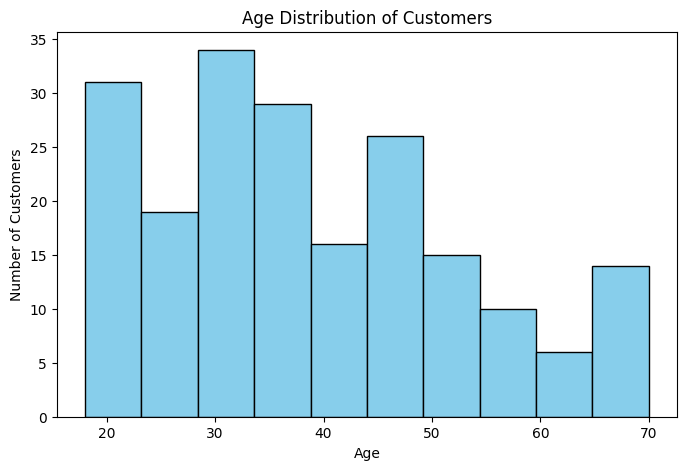

In [15]:
#histogram of the Age distribution.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(mall_df["Age"], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()



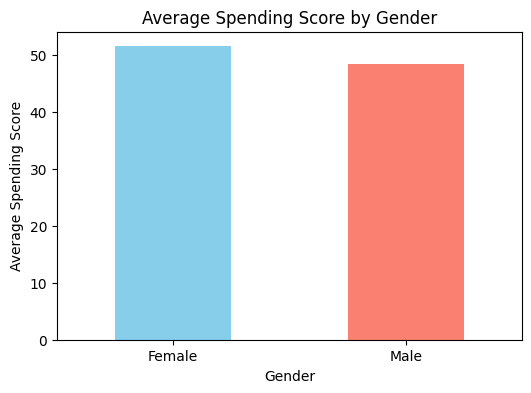

In [16]:
#bar chart showing average spending score by gender.
import matplotlib.pyplot as plt

# Calculate average spending score by gender
avg_spending_by_gender = mall_df.groupby("Gender")["Spending Score (1-100)"].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
avg_spending_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Average Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.show()



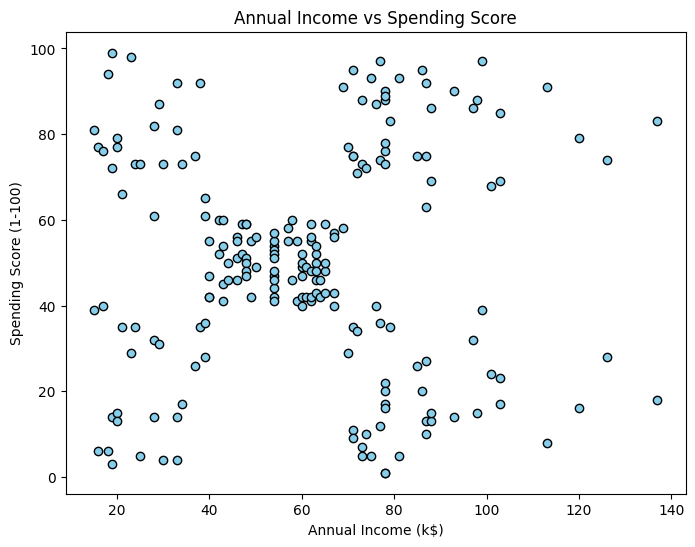

In [17]:
#scatter plot showing Annual Income vs Spending Score.
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(mall_df["Annual Income (k$)"], mall_df["Spending Score (1-100)"],
            color='skyblue', edgecolor='black')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_7296\49510875.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age_Group", y="Spending Score (1-100)", data=mall_df, palette="pastel")


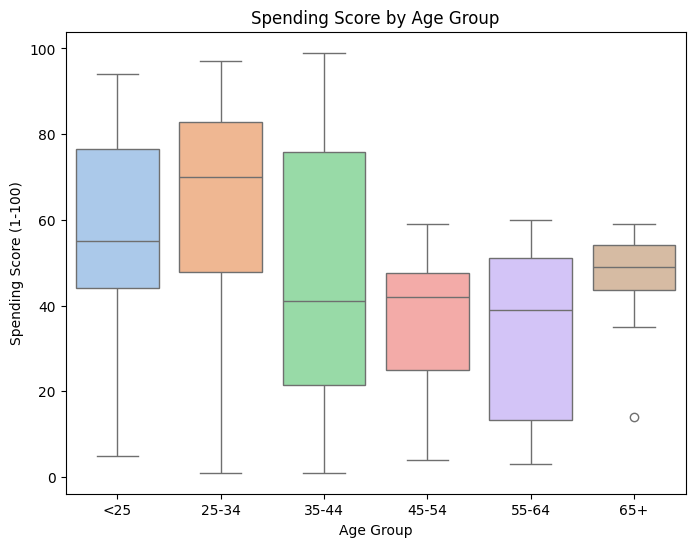

In [18]:
#boxplot showing spending score grouped by age bins.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age bins and labels 
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]

mall_df["Age_Group"] = pd.cut(mall_df["Age"], bins=age_bins, labels=age_labels, right=False)

# Create boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="Age_Group", y="Spending Score (1-100)", data=mall_df, palette="pastel")
plt.title("Spending Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.show()



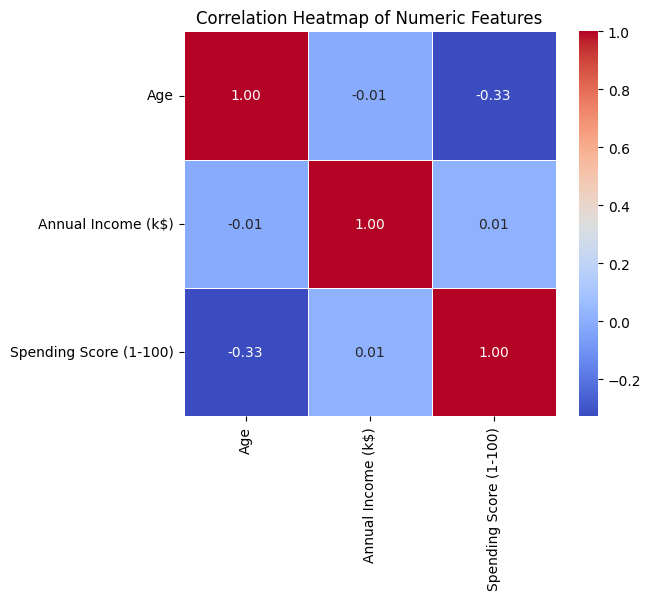

In [22]:
# heatmap showing the correlations between numeric features.
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Compute correlation matrix
corr_matrix = mall_df[numeric_cols].corr() #computes the correlation between each pair of numeric columns.

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
#annot=True shows the correlation values on the heatmap.
#cmap sets the colour scheme."coolwarm" shows positive correlations in red tones and negative correlations in blue tones.
#fmt=".2f" formats numbers to 2 decimal places.

plt.title("Correlation Heatmap of Numeric Features")
plt.show()





####DIMENSIONALITY REDUCTION (PCA & t-SNE)

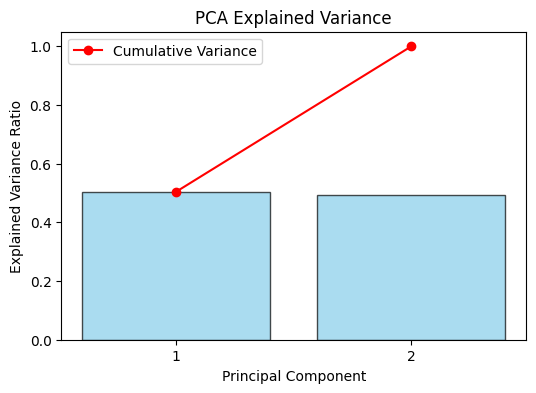

PC1: 0.50
PC2: 0.50


In [ ]:
#Run PCA on standardized income and spending features and plot explained variance.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features for PCA
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler() #StandardScaler() ensures both features are on the same scale.
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_  #proportion of variance explained by each principal component.

# Plot explained variance
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='skyblue', edgecolor='black')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', color='red', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.show()

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}")



####The bar chart shows variance per component, and the red line shows cumulative variance.

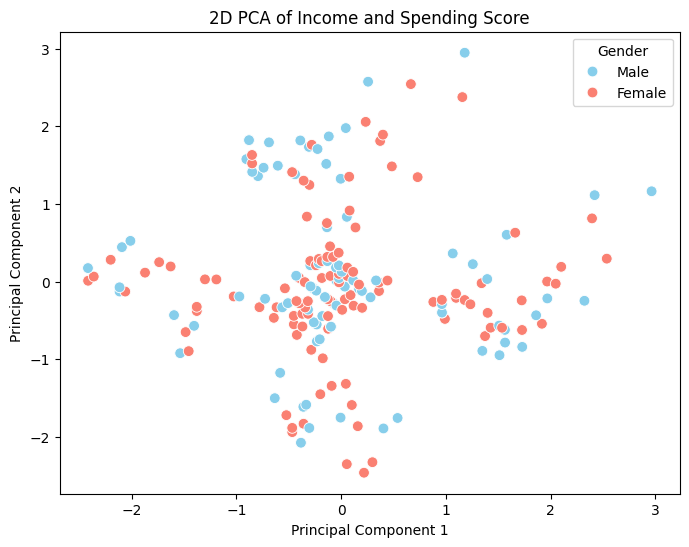

In [24]:
#Plot 2D PCA components scatter colored by a category (e.g., Gender).
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for PCA
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA (2 components)
pca = PCA(n_components=2)  #n_components=2 reduces the data to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components and Gender
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Gender"] = mall_df["Gender"]

# Plot 2D scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Gender", data=pca_df, palette=["skyblue","salmon"], s=60)
#hue="Gender" colors the points by gender for comparison.
#s=60 adjusts the marker size.
plt.title("2D PCA of Income and Spending Score")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Gender")
plt.show()


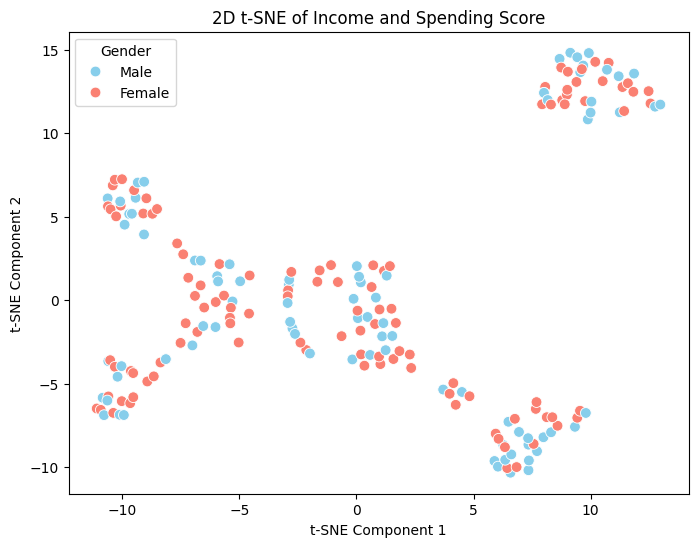

In [29]:
#Run t-SNE and plot the 2D embedding.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #fit_transform() standardizes X so both columns have mean 0 and standard deviation 1.

# Run t-SNE with correct parameter
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42) 
#perplexiry balanaces local vs global structure. 30 is common by default.
#max_iter is the number of optimaztion iterations.
#random_state ensures that results are reproducible.
#n_components reduces the data to 2 dimensions.
#TSNE compresses high-dimensional data into 2D/3D while keeping similar points close together & different points far apart.
X_tsne = tsne.fit_transform(X_scaled)

# Create DataFrame with t-SNE components and Gender
tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"]) #craetes a new DataFrame with the t-SNE results.
tsne_df["Gender"] = mall_df["Gender"]

# Plot 2D t-SNE embedding
plt.figure(figsize=(8,6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Gender", data=tsne_df, palette=["skyblue","salmon"], s=60)
plt.title("2D t-SNE of Income and Spending Score")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Gender")
plt.show()




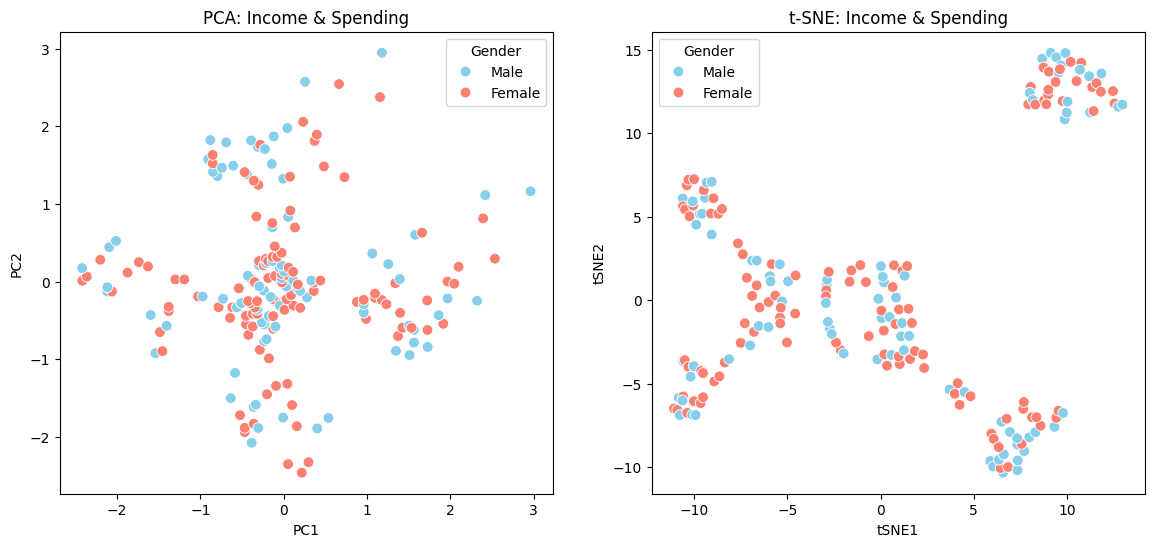

In [31]:
#Compare PCA and t-SNE plots — show the one with clearer clusters.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Select features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Gender"] = mall_df["Gender"]

# --- t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["Gender"] = mall_df["Gender"]

# --- Plot Side by Side ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# PCA Plot
sns.scatterplot(ax=axes[0], x="PC1", y="PC2", hue="Gender", data=pca_df, 
                palette=["skyblue","salmon"], s=60)
axes[0].set_title("PCA: Income & Spending")

# t-SNE Plot
sns.scatterplot(ax=axes[1], x="tSNE1", y="tSNE2", hue="Gender", data=tsne_df, 
                palette=["skyblue","salmon"], s=60)
axes[1].set_title("t-SNE: Income & Spending")

plt.show()


####CLUSTERING AND EVALUATION

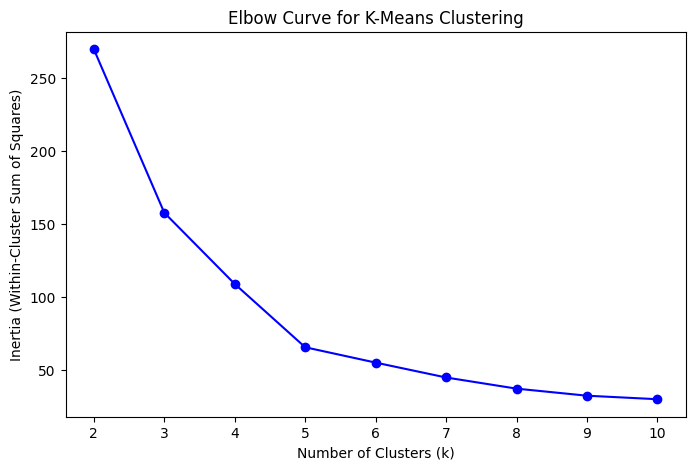

In [ ]:
#Run k-means for k=2…10 on standardized features and plot the elbow curve.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select features (you can add more if you want)
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #This makes the two columns comparable by giving them mean 0 and standard deviation 1

# Run KMeans for k = 2 to 10
inertia = [] #list to store inertia values
K = range(2, 11) #k values from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    #random_state=42 makes the result repeatable so you get the same clusters if you run it again.
    #n_init=10 runs the algorithm 10 times with different starts and picks the best result. This gives more stable clusters.
    #fit finds the cluster centers.
    #inertia_ is the sum of squared distances from each point to its cluster center.
    #Lower inertia means points are closer to their centers, so clusters are tighter. You store that number for later.
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Curve for K-Means Clustering")
plt.show()


####Explanation

#If inertia drops a lot when you go from k to k+1, adding that cluster helped a lot.

#When the drop becomes small, extra clusters add little value.


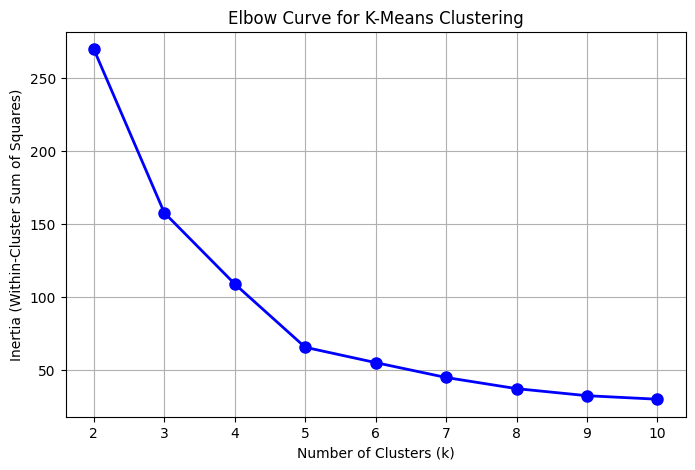

In [36]:
#Run k-means for k=2…10 on standardized features and plot the elbow curve.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select the features we want to cluster on
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans for k = 2 to 10 and collect inertia values
inertia = []   # this will store the sum of squared distances for each k
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    #KMeans is the algorithm that groups customers into clusters.
    #random_state=42 ensures results are the same every time you run the code.
    #n_init=10 runs K-means 10 times and picks the best result (to avoid bad luck with starting points).
    #.fit() trains the model and finds cluster centers.
    #.inertia_ measures how close the points are to their cluster centers (smaller = tighter clusters).
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Curve for K-Means Clustering")
plt.grid(True)
plt.show()


####Explanation

#k (2…10) on the x-axis and inertia on the y-axis.

#curve slopes downward. The elbow is the point where the drop slows down.

#The elbow is the best number of clusters because adding more clusters after that point does not improve the fit much.

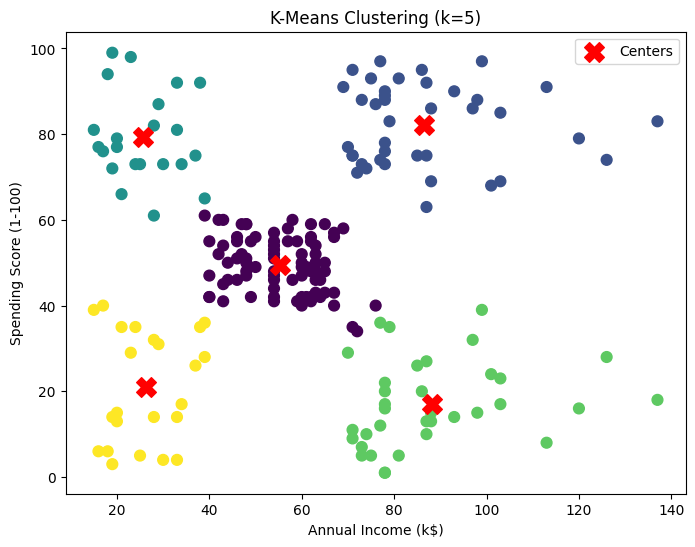

In [38]:
#Plot clusters for the chosen k using a scatter plot.
#k is where the curve bends(the elbow pint)
from sklearn.cluster import KMeans #clustering of the algorithm
import matplotlib.pyplot as plt #Visualization of data 
from sklearn.preprocessing import StandardScaler #standardizing the data

# Select features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chosen number of clusters (from elbow curve) - let's say k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
mall_df["Cluster"] = kmeans.fit_predict(X_scaled)
#n_clusters=k tells it how many groups to find.
#.fit_predict finds the cluster centres and assigns each point to a cluster.

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(mall_df["Annual Income (k$)"], 
            mall_df["Spending Score (1-100)"], 
            c=mall_df["Cluster"], cmap="viridis", s=60)

#This makes a scatter plot with income on the x axis and spending score on the y axis.
#c=mall_df["Cluster"] colours the points by their cluster.
#cmap="viridis" sets the colur scheme.
#s=60 adjusts the marker size.


# Plot cluster centers (rescale back from standardized values)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
#scaler.inverse_transform converts them back to the original income and spending units.
#This will make them sit in the same coordinates as the points.
#The centers are plotted as big red X marks.This helps to see where each cluster is centered.

plt.scatter(centers[:,0], centers[:,1], c="red", s=200, marker="X", label="Centers")

plt.title(f"K-Means Clustering (k={k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()



####Describing the Scatter plot

#Points with the same color belong to the same cluster.

#The red X marks show the typical income and spending score for that cluster.

#Typical interpretations might be low income low spending, high income high spending, and mixed groups in between.

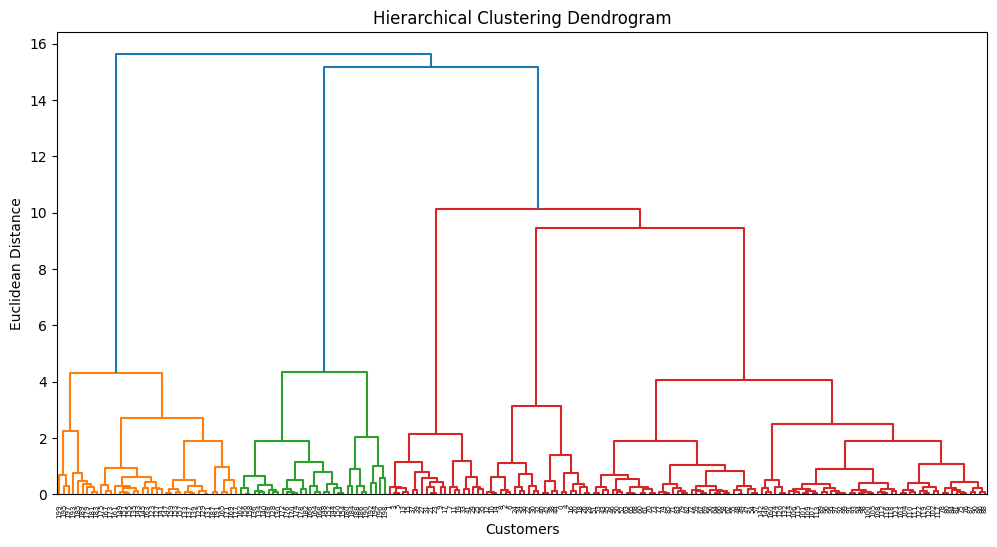

In [40]:
#Run hierarchical clustering and visualize a dendrogram.
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Select features (Income & Spending Score)
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run hierarchical clustering (dendrogram)
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="ward"))
#sch.linkage with method="ward" builds the hierarchy by merging clusters that result in the smallest increase in variance.
#sch.dendrogram plots the tree diagram showing how clusters areb merged at each step.
#The y-axis shows the distance at which clusters are merged.
#The axis show the individual data points(customers) being clustered.
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()



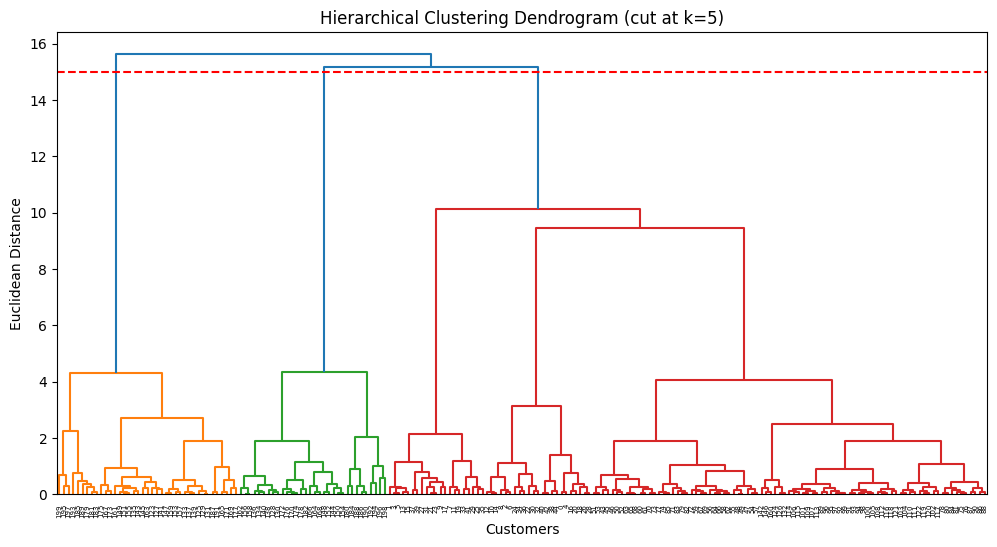

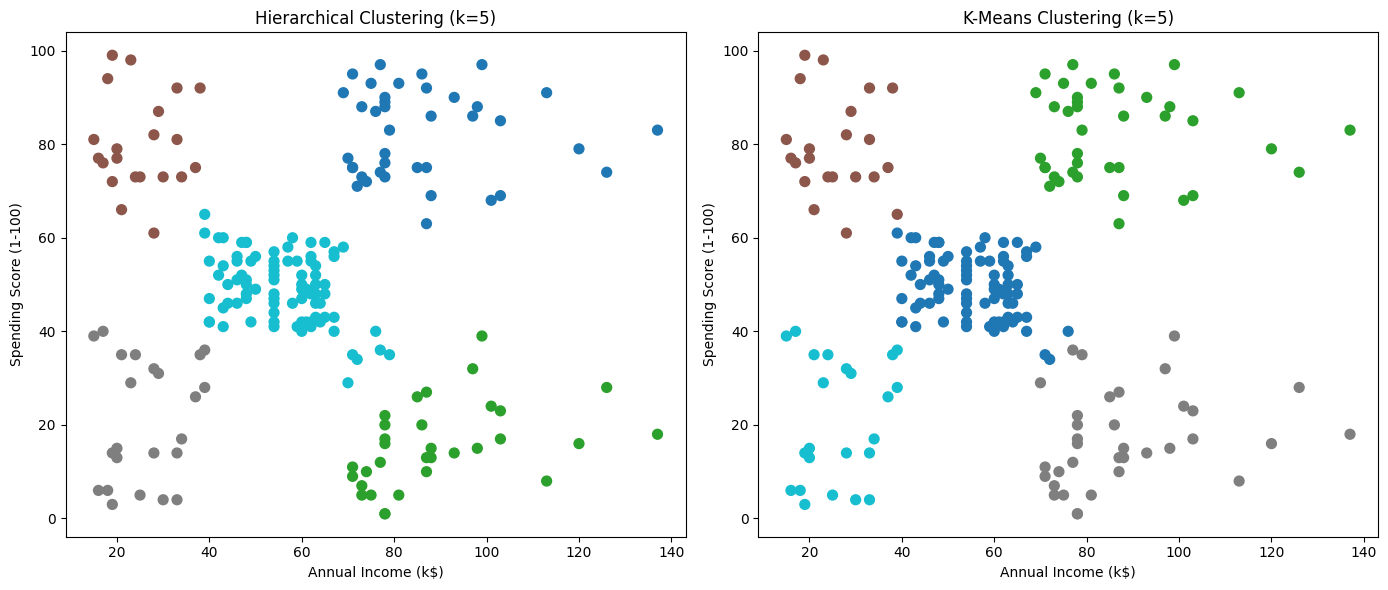

In [ ]:
#Cut the dendrogram at k clusters and compare with k-means.
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch #for hierchial clustering and dendrograms
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster # fcluster cuts the dendrogram to form flat clusters.

# Select features (Income & Spending Score)
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 1. Hierarchical clustering
# -----------------------------
# Linkage matrix
linkage_matrix = sch.linkage(X_scaled, method="ward") #ward minimizes

# Cut the dendrogram to form k clusters (e.g., k=5)
k = 5
hier_clusters = fcluster(linkage_matrix, k, criterion="maxclust")

# Plot dendrogram with cut line
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.axhline(y=15, color="red", linestyle="--")  # Example cut line
plt.title("Hierarchical Clustering Dendrogram (cut at k=5)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# -----------------------------
# 2. K-Means clustering
# -----------------------------
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# -----------------------------
# 3. Compare clusters visually
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hierarchical clusters scatter
axes[0].scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], 
                c=hier_clusters, cmap="tab10", s=50)
axes[0].set_title("Hierarchical Clustering (k=5)")
axes[0].set_xlabel("Annual Income (k$)")
axes[0].set_ylabel("Spending Score (1-100)")

# K-Means clusters scatter
axes[1].scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], 
                c=kmeans_clusters, cmap="tab10", s=50)
axes[1].set_title("K-Means Clustering (k=5)")
axes[1].set_xlabel("Annual Income (k$)")
axes[1].set_ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()




####Left plot shows hierarchical clusters.
#Right plot shows K-Means clusters.

In [42]:
#Profile each cluster: average age, income, spending score.


# Assume kmeans_clusters are already created
mall_df["Cluster"] = kmeans_clusters  # add cluster labels to the dataframe

# Profile each cluster
cluster_profile = mall_df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

print("Cluster Profiles (Average Age, Income, Spending Score):")
print(cluster_profile)



Cluster Profiles (Average Age, Income, Spending Score):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [43]:
#Check cluster sizes  to see if some clusters are  too small
# Count how many customers are in each cluster
cluster_sizes = mall_df["Cluster"].value_counts().sort_index()
#.value_counts() counts how many customers belong to each cluster
#.sort_index() sorts the counts by cluster number for easier reading.

print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [46]:
#Run k-means with different random states and see if cluster assignments change.

from sklearn.cluster import KMeans
import pandas as pd

# Select features (Income & Spending Score)
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = mall_df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try K-Means with different random states
results = {}
for seed in [0, 10, 20, 42, 100]:
    kmeans = KMeans(n_clusters=5, random_state=seed, n_init=10)
    #random_state=seed fixes the random initialization for that run (so it’s reproducible)
    clusters = kmeans.fit_predict(X_scaled)
    results[seed] = clusters
    #fit_predict finds the cluster centres and assigns each point to a cluster.
    #results[seed] - clusters stores that array in the dictionary under the key of the seed.

# Compare cluster assignments
comparison_df = pd.DataFrame(results)
print("Cluster assignments with different random states:")
print(comparison_df.head(15))  # show first 15 customers



Cluster assignments with different random states:
    0    10   20   42   100
0     3    4    3    4    3
1     4    3    4    2    2
2     3    4    3    4    3
3     4    3    4    2    2
4     3    4    3    4    3
5     4    3    4    2    2
6     3    4    3    4    3
7     4    3    4    2    2
8     3    4    3    4    3
9     4    3    4    2    2
10    3    4    3    4    3
11    4    3    4    2    2
12    3    4    3    4    3
13    4    3    4    2    2
14    3    4    3    4    3


####Explanation for the output
#Each row = one customer (the first 15 customers in the dataset).
#Each column = the cluster label assigned when you ran K-Means with a different random seed.

Column 0 - results from K-Means with random_state=0

Column 10 - results from random_state=10

Column 20 - results from random_state=20

Column 42 - results from random_state=42

Column 100 - results from random_state=100

#The numbers inside (like 3, 4, 2) are the cluster IDs that K-Means gave to each customer.

In [47]:
#Export the dataset with cluster labels to CSV.
# Export dataset with cluster labels
mall_df.to_csv("mall_customers_with_clusters.csv", index=False)

print("Dataset exported successfully as mall_customers_with_clusters.csv")



Dataset exported successfully as mall_customers_with_clusters.csv
